# Préparation des données

### Données obenues auprès de https://world.openfoodfacts.org


### Objectif du présent document

Préparer le jeu de données en en vue de la réalisation d'une analyse univariée, bivariée et exploratoire des variables pertinentes au regard de notre proposition d'application dans le cadre d'un appel d'offre de "Santé Publique".


### Contexte de réalisation de l'étude

Notre étude du jeu de données devra être simple à comprendre pour un public néophyte. 
Nous devrons donc être particulièrement attentifs à la lisibilité et aux choix des graphiques pour illustrer notre propos.
    
### Direction de l'étude

Après une analyse univariée et bivariée du jeu de données, nous pourrons réaliser une ACP afin de comprendre les caractéristiques les plus discriminantes de notre ensemble de produits, ainsi qu'un partitionnement afin de plus simplement 
catégoriser les produits (beaucoups de catégories présentes dans le jeu).

Aussi nous pourrons effectuer quelques régressions pour étudier par exemple la correspondance entre nutriscore et nombre d'ingrédients dans un produit, la présence d'additifs ou d'allergènes.

Enfin, nous proposerons une métrique rendant compte de la qualité intrinsèque des produits, ainsi que de leur impact sur l'environnement, une métrique qui se voudra plus transparente envers le consommateur sur le bien fondé de la proposition de valeur qu'ils représentent.

### Idée d'application

Nous proposons un outil permettant au consommateur de mieux apprécier la qualité des produits qu'il consomme, et qui sera principalement basé sur l'appréciation des critères suivants :
- Le nustricore (valeur numérique)
- Le critère NOVA qui range en 4 catégories les produits en fonction de leur taux de transformation industrielle
- La présence d'addifits, d'allergènes, d'ingrédidents issus de l'huile de palme
- La disparité entre l'origine du produit, son lieu de transformation et la FRANCE
- L'appartenance du produit à un label BIO ou qui s'engage à prendre mieux soin des consommateurs
- Le type de packaging utilisé pour conditionner le produit

## Récupération des données

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno
import FETCH_LOAD_DATAS

In [2]:
help(FETCH_LOAD_DATAS)

Help on module FETCH_LOAD_DATAS:

NAME
    FETCH_LOAD_DATAS

DESCRIPTION
    Ce module contient la définition des variables de chemins ainsi que l'importation des librairies nécessaires à la définition des 2 fonctions suivantes:
    - fetch_food_data() : qui sert à télécharger dans un sous-dossier du dossier de travail, 'datasets', le fichier .csv contenant  le jeu de données complet issu de https://fr.openfoodfacts.org/data
    - load_food_data() : qui sert à charger ce jeu de données dans un DataFrame

FUNCTIONS
    fetch_food_data(food_path='datasets', dwnld_url='https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip', zip_path='datasets\\fr.openfoodfacts.org.products.csv.zip', file_name='fr.openfoodfacts.org.products.csv')
        fonction d'extraction des données depuis https://world.openfoodfacts.org/data
    
    load_food_data(file_path='datasets\\fr.openfoodfacts.org.products.csv')
        fon

## Découverte du jeu de données

In [4]:
df_food = FETCH_LOAD_DATAS.load_food_data()

C:\Users\jkomb\Desktop\Notebooks IA\+2. Projet Application Santé Publique\FETCH_LOAD_DATAS.py:31: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path, delimiter ="\t", on_bad_lines='skip')


In [5]:
df = df_food.copy()

In [6]:
df.shape

(320772, 162)

In [7]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isna().mean().mean()

0.7622157263195134

<AxesSubplot:>

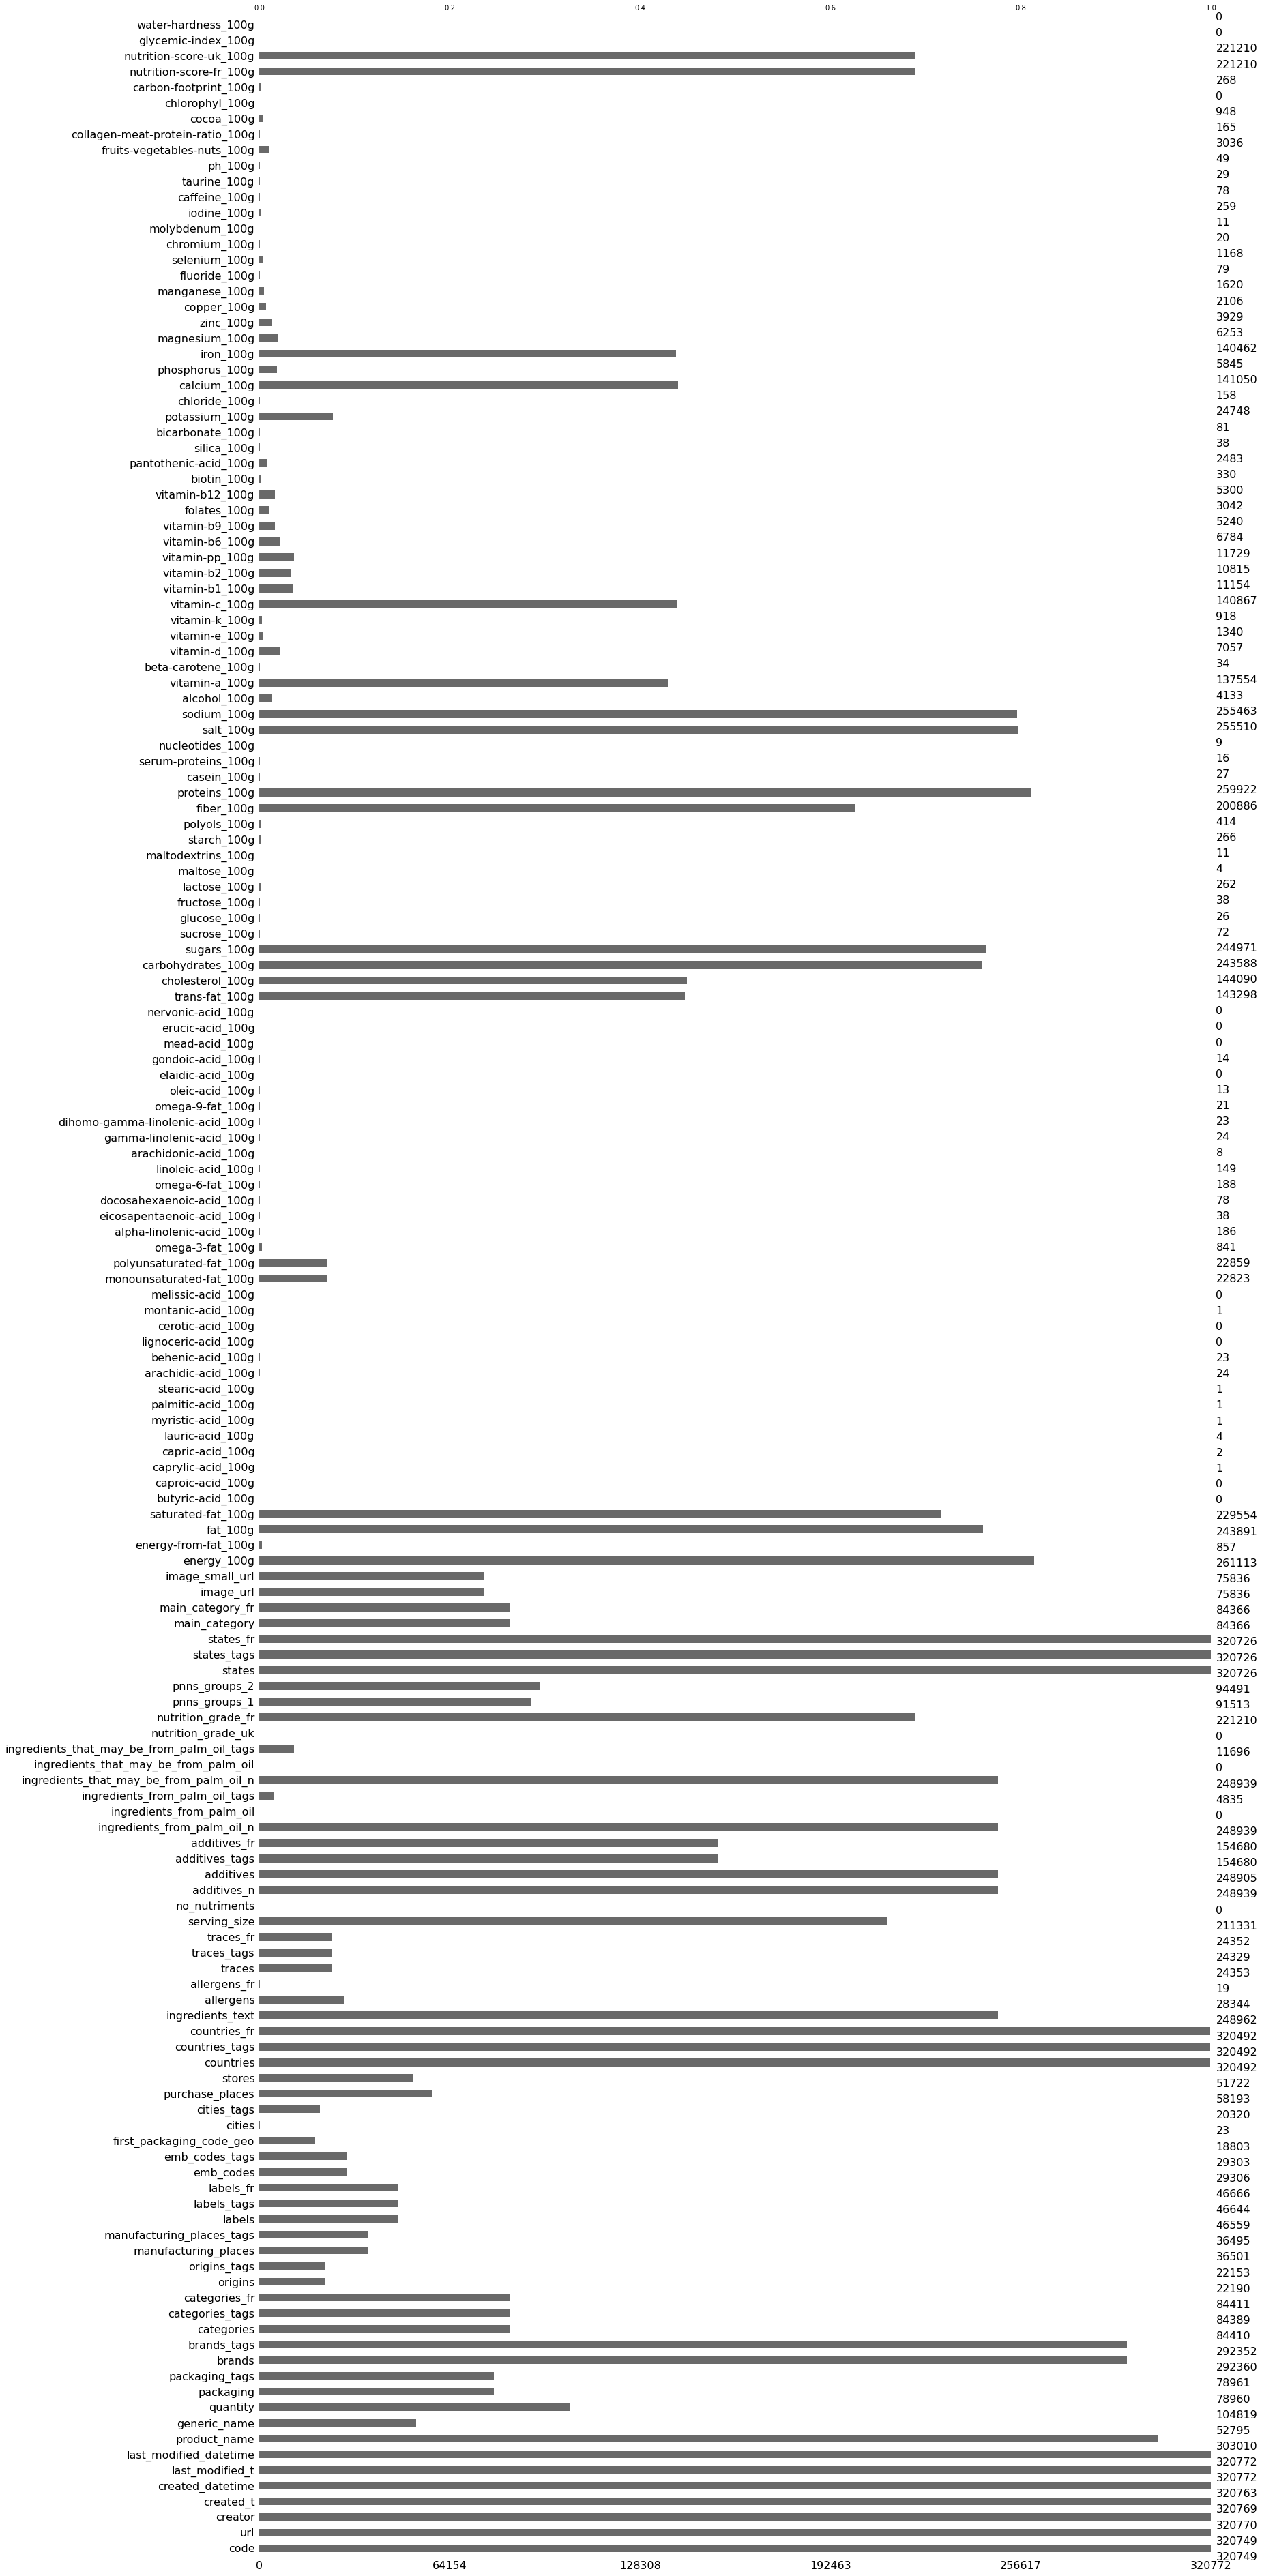

In [9]:
#trier par valeur de taux de remplissage
msno.bar(df)

In [10]:
#cellule utilisée pour naviguer à traver les colonnes pour se faire une idée des valeurs qu'elles contiennent
df['traces_tags'].value_counts()[20:]

en:gluten,en:milk                                                      184
en:celery,en:mustard                                                   181
en:eggs,en:gluten,en:nuts                                              180
en:nuts,en:peanuts,en:sesame-seeds,en:soybeans                         177
en:milk,en:nuts,en:peanuts                                             171
                                                                      ... 
en:celery,en:gluten,en:sesame-seeds,en:soybeans,fr:fruitqs-a-coques      1
fr:brisures-de-noyaux                                                    1
en:gluten,en:soybeans,fr:produits-laitiers                               1
en:celery,en:gluten,en:milk,fr:produits-laitiers                         1
en:fish,en:gluten,en:molluscs,en:soybeans                                1
Name: traces_tags, Length: 3558, dtype: int64

<AxesSubplot:>

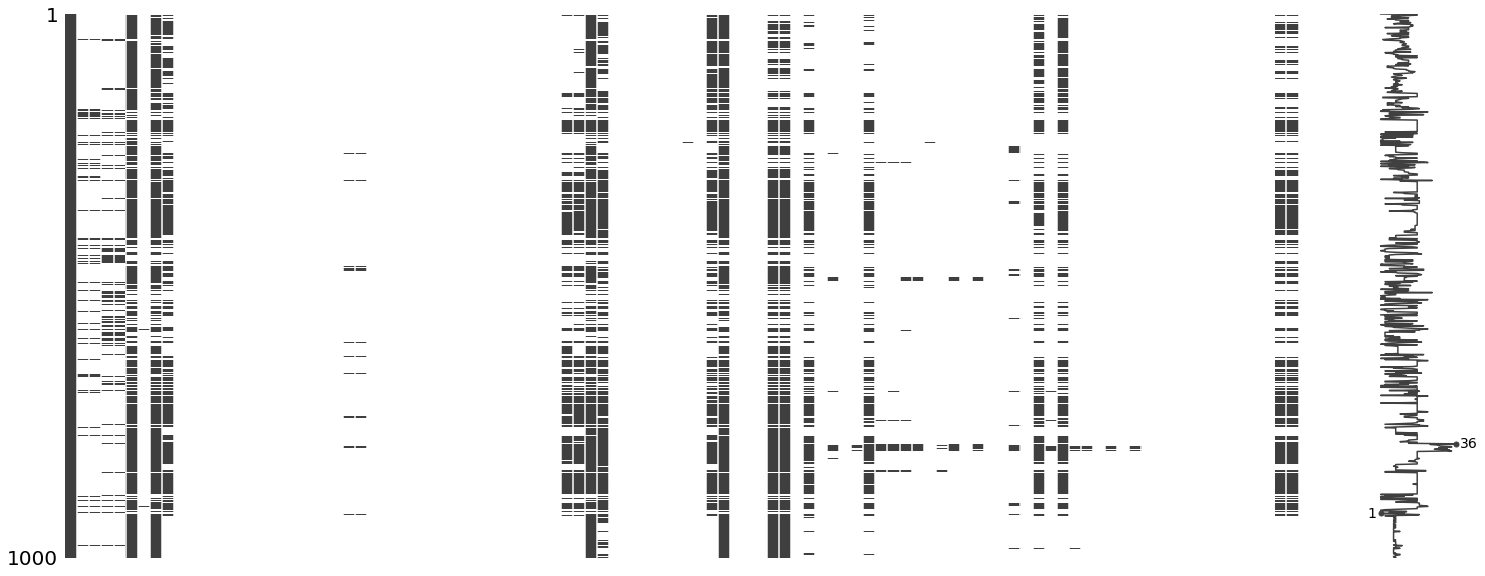

In [11]:
#cellule utilisée pour naviguer dans le jeu de données pour observer les taux de remplissage par bloc
msno.matrix(df.iloc[:1000,58:])

<AxesSubplot:>

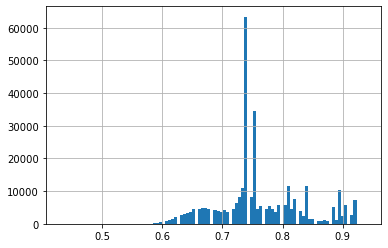

In [12]:
df.isna().mean(axis=1).hist(bins=100)

In [13]:
df.isna().mean(axis=1)[df.isna().mean(axis=1) > 0.75]

0         0.895062
1         0.765432
2         0.753086
3         0.777778
4         0.833333
            ...   
320766    0.864198
320767    0.882716
320769    0.820988
320770    0.895062
320771    0.796296
Length: 157343, dtype: float64

<AxesSubplot:>

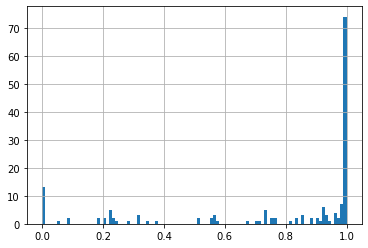

In [14]:
df.isna().mean().hist(bins=100)

In [15]:
df.isna().mean()[df.isna().mean() > 0.90]

origins                     0.930823
origins_tags                0.930938
emb_codes                   0.908639
emb_codes_tags              0.908649
first_packaging_code_geo    0.941382
                              ...   
cocoa_100g                  0.997045
chlorophyl_100g             1.000000
carbon-footprint_100g       0.999165
glycemic-index_100g         1.000000
water-hardness_100g         1.000000
Length: 100, dtype: float64

### Description du jeu de données

Le jeu de données est un ensemble de 320772 lignes et 160 colonnes qui présente un certain nombre de caractéristiques de produits alimentaires : 
- <b>générales</b> (origine, site de transformation, packaging, ingrédients, etc.)
- <b>particulières</b> (présence d'additifs, présence d'allergènes, appartenance à un label bio ou autre, etc.)
- <b>nutritionnelles</b> (taux de protéines, fibres, graisses monosaturées, vitamine b6, etc.)

Les caractéristiques de chaque produit sont réparties en <u>5 parties significatives</u> :
1. Une partie générale relative à la base de données du site https://world.openfoodfacts.org/data
2. Une partie informative contenant des métadonnées du produit (packaging, origine, lieu de transformation, etc.)
3. Une partie 'constitution du produit' avec les ingrédients, allergènes et traces d'autres produits qu'il peut contenir
4. Une partie présentant des informations diverses telles que la présence d'additifs, d'huile de palme et notamment sur le NUTRISCORE** du produit
5. Une partie nutritionnelle où l'on retrouve toutes les informations typiques d'énergie pour 100g de produit consommé, la teneur en 96 nutriments différents pour 100 g de produits ainsi que le nutriscore** du produit.

** On fait ici la différence entre le NUTRISCORE (A,B,C,D,E) et le nutriscore qui est la valeur numérique avant transformation en catégorie (A,B,C,D,E). Cette distinction sera faite dans toute la suite de notre étude.

Le jeu de données présente un taux de valeurs manquantes de <b>76%</b> :
- Près de la moitié des colonnes présentent un taux de valeurs manquantes supérieur à <b>99%</b>, mode de la distribution des  taux de valeurs manquantes des colonnes (74 colonnes)
- Plus de 60% des colonnes présentent un taux de valeurs manquantes supérieur à <b>90%</b> (100 colonnes)
- Plus de 2/3 des lignes (71%) présentent un taux de valeurs manquantes supérieur à <b>75%</b>, mode de la distribution des taux de valeurs manquantes des lignes (229030 lignes)

### Sélection des variables utiles

Pour la suite de notre étude du jeu de données, nous allons, partie par partie décortiquer les variables que nous allons garder, et selon ces colonnes, les individus dont nous allons nous séparer.

Comme il y a significativement plus valeurs pour les colonnes du début du tableau, que pour les colonnes du milieu vers la fin du tableau (à l'exception du nutriscore), nous considérons que nous pourrons épurer celui-ci de gauche à droite, de partie en partie, à quelques exceptions près de variables peut-être.

<AxesSubplot:>

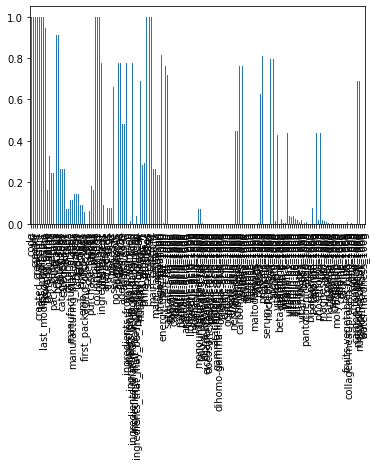

In [16]:
df_food.notna().mean().plot.bar()

#### 1. Partie générale relative à la base de données des produits

In [17]:
col1 = list(df.columns[:df.columns.get_loc('packaging')])
col1

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity']

Nous n'allons conserver que les colonnes 'code', 'url', 'last_modified_datetime' et 'product_name'.
- Nous espérons à ce stade utiliser la colonne 'code' comme identifiant unique pour chaque produit.
- La colonne 'url' renvoie à la page produit sur le site "openfoodfacts"
- La colonne 'last_modified_datetime' pourra nous prévenir de l'ajout d'information sur un produit que nous pourrons alors peut être mieux analyser
- La colonne 'product_name' pour permettre à l'utilisateur de notre application de réaliser une recherche textuelle simple


In [18]:
col_part1_to_drop = [x for x in col1 if x not in ['code','url','last_modified_datetime','product_name' ]]
df.drop(columns=col_part1_to_drop, inplace=True)

In [19]:
df.dropna(subset=['code'],inplace=True, axis=0)

In [20]:
df[df['code'].duplicated(keep=False)].sort_values('code', ascending=True).head()

,code,url,last_modified_datetime,product_name,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
9892,11778,http://world-fr.openfoodfacts.org/produit/0011...,2017-04-02T14:13:05Z,All Butter Reduced Fat Stem Ginger Cookies,"Plastique,Sachet","plastique,sachet",Marks & Spencer,marks-spencer,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Coo...","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN
458,11778,http://world-fr.openfoodfacts.org/produit/0001...,2017-03-31T16:12:52Z,Stem Ginger Cookies,plastique,plastique,Marks & Spencer,marks-spencer,Cookies,"en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN
6,16117,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:30Z,Organic Long Grain White Rice,NaN,NaN,Lundberg,lundberg,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,16117,http://world-fr.openfoodfacts.org/produit/0001...,2017-03-09T13:14:18Z,Colossal Olives With Jalapeno Peppers,NaN,NaN,Trader Joe's,trader-joe-s,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,24600,http://world-fr.openfoodfacts.org/produit/0002...,2015-06-27T12:03:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pour les doublons, à ce stade, nous n'allons garder que l'occurence présentant le plus faible taux de valeurs manquantes.

In [21]:
df['taux_Nan'] = df.isna().mean(axis=1)
df.sort_values('taux_Nan', ascending=False, inplace=True)
df.drop_duplicates(subset=['code'], keep='first', inplace=True)
df.drop('taux_Nan', axis=1, inplace=True)

In [22]:
df.shape

(320638, 156)

In [23]:
df['code'].isna().mean()

0.0

In [24]:
df['code'].nunique()/df['code'].shape[0]

1.0

In [25]:
df_1 = df.copy()

La colonne 'code' peut désormais être considérée comme notre colonne identifiante pour nos données.
Le travail sur le jeu de données vis-à-vis de la partie 1 est terminée.

### RAF partie 1 :
- vérifier la validité des 'url' (https://www.moonbooks.org/Articles/Vérifier-si-une-adresse-url-existe-avec-python/)
- vérifier la validité des dates de la colonne 'last_modified_datetime'

#### 2. Partie informative contenant des métadonnées du produit

In [307]:
col2 = list(df.columns[df.columns.get_loc('packaging'):(df.columns.get_loc('countries_fr')+1)])

KeyError: 'countries_fr'

In [27]:
df[col2].isna().mean()

packaging                    0.753794
packaging_tags               0.753791
brands                       0.088533
brands_tags                  0.088558
categories                   0.736871
categories_tags              0.736871
categories_fr                0.736871
origins                      0.930872
origins_tags                 0.930988
manufacturing_places         0.886252
manufacturing_places_tags    0.886270
labels                       0.854814
labels_tags                  0.854549
labels_fr                    0.854549
emb_codes                    0.908604
emb_codes_tags               0.908617
first_packaging_code_geo     0.941358
cities                       1.000000
cities_tags                  0.936698
purchase_places              0.818627
stores                       0.838800
countries                    0.000873
countries_tags               0.000873
countries_fr                 0.000873
dtype: float64

In [28]:
# cellule utilisée pour explorer les différents nombres de valeurs uniques
df['categories_fr'].value_counts()

Snacks sucrés,Biscuits et gâteaux,Biscuits                                                                                                                          802
Snacks sucrés,Chocolats,Chocolats noirs                                                                                                                             609
Snacks sucrés,Confiseries,Bonbons                                                                                                                                   526
Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit-déjeuner    522
Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat                                                                                                     465
                                                                                                                                                                

- Dans un premier temps, nous n'allons garder que les produits distribués en France en effectuant un tri sur la colonne 'countries_fr', puis nous allons supprimer toutes les colonnes 'countries_x'


- Ensuite, nous allons supprimer toutes les colonnes "_tags" car elles comportent les mêmes données que les colonnes auxquelles elles sont associées, mais avec une mise en forme qui les rend plus difficilement lisibles.
    

- Nous allons également supprimer les colonnes 'cities', 'cities_tags' ainsi que 'purchase_places' car nous considérons que les produits sont disponibles partout en France, ainsi que la colonne 'categories' qui est redondante avec la colonne 'categories_fr' et moins synthétique (moins de valeurs uniques pour un taux de remplissage identique).



In [29]:
df = df_1.copy()

In [30]:
df = df[df['countries_fr'].str.contains('France', regex=False).fillna(False)]

In [31]:
L_split = [col.split('_') for col in col2]
L_tags = ['tags' in x for x in L_split]
col_part2_to_drop = [x for x,y in zip(col2, L_tags) if y]
col_part2_to_drop.append('countries')
col_part2_to_drop.append('countries_fr')
col_part2_to_drop.append('purchase_places')
col_part2_to_drop.append('cities')
col_part2_to_drop.append('categories')
df.drop(columns=col_part2_to_drop, inplace=True)

In [32]:
df.shape

(98427, 142)

In [33]:
df.head()

,code,url,last_modified_datetime,product_name,packaging,brands,categories_fr,origins,manufacturing_places,labels,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
218309,3266980307608,http://world-fr.openfoodfacts.org/produit/3266...,2016-10-28T12:13:27Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218287,3266980137021,http://world-fr.openfoodfacts.org/produit/3266...,2016-12-15T13:00:21Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217572,3265477728001,http://world-fr.openfoodfacts.org/produit/3265...,2016-09-14T08:30:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218311,3266980318680,http://world-fr.openfoodfacts.org/produit/3266...,2016-09-30T21:15:39Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218240,3266470095459,http://world-fr.openfoodfacts.org/produit/3266...,2017-02-06T18:08:56Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df['url'].str.startswith('http').sum()

98427

In [35]:
df_2 = df.copy()

### RAF partie 2 :
- vérifier les données aberrantes des colonnes

#### 3. Partie 'constitution du produit'



In [271]:
df = df_2.copy()

In [272]:
col3 = list(df.columns[df.columns.get_loc('ingredients_text'):df.columns.get_loc('serving_size')])
col3

['ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr']

In [173]:
df[col3]

,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr
218309,NaN,NaN,NaN,NaN,NaN,NaN
218287,NaN,NaN,NaN,NaN,NaN,NaN
217572,NaN,NaN,NaN,NaN,NaN,NaN
218311,NaN,NaN,NaN,NaN,NaN,NaN
218240,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
190582,"_Lait_ partiellement écrémé, perméat de lactos...","Lait, lait, soja",NaN,NaN,NaN,NaN
190664,Eau - _lait_ partiellement écrémé - Perméat de...,"lait, lait, soja, soja",NaN,NaN,NaN,NaN
253925,_Lait_ de chèvre en poudre* (40% origine Franc...,"Lait, lactose",NaN,Lait de vache,fr:lait-de-vache,Lait-de-vache
197594,"_lait_ partiellement écrémé, eau, _lactose_, m...","lait, lactose",NaN,NaN,NaN,NaN


In [174]:
df[col3].isna().mean()

ingredients_text    0.456907
allergens           0.767340
allergens_fr        1.000000
traces              0.805318
traces_tags         0.805328
traces_fr           0.805328
dtype: float64

In [175]:
df[col3].nunique()

ingredients_text    49095
allergens            9971
allergens_fr            0
traces               5921
traces_tags          2375
traces_fr            2375
dtype: int64

A ce stade nous savons que nous allons supprimer la colonne 'allergens_fr', 'traces_tags' qui nous fournit une information similaire à celle de 'traces_fr' mais en anglais et dans une mise en forme moins lisible et 'traces' qui nous fournit une information moins synthétique que 'traces_fr' (plus de valeurs uniques pour le même taux de remplissage).

Notons que les colonnes 'allergens' et 'traces_fr' contiennent le même type d'information : la présence de substances pouvant provoquer une allergie.

- Nous combinerons donc ces 2 colonnes en espérant ainsi obtenir une information plus complète.

In [273]:
df.drop(['allergens_fr','traces_tags','traces'], axis=1, inplace=True)

In [274]:
col3 = list(df.columns[df.columns.get_loc('ingredients_text'):df.columns.get_loc('serving_size')])
df[col3].isna().mean()

ingredients_text    0.456907
allergens           0.767340
traces_fr           0.805328
dtype: float64

In [178]:
df['categories_fr'].value_counts()[:20]

Snacks sucrés,Biscuits et gâteaux,Biscuits                                                                                                                                                                                                       580
Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat                                                                                                                                                                                  440
Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit-déjeuner                                                                                 428
Snacks sucrés,Chocolats,Chocolats noirs                                                                                                                                                                                                          427
Snacks sucrés,Confis

<AxesSubplot:ylabel='traces_fr'>

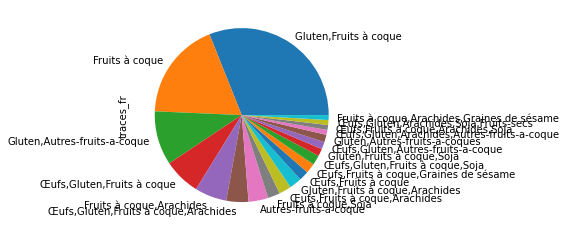

In [179]:
cat ="Snacks sucrés,Chocolats,Chocolats au lait"
df[df['categories_fr'] == cat]['traces_fr'].value_counts()[:20].plot.pie()

In [180]:
df[df['categories_fr'] == cat].loc[df['traces_fr'].isna(),].head()

,code,url,last_modified_datetime,product_name,packaging,brands,categories_fr,origins,manufacturing_places,labels,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
227403,3350031682810,http://world-fr.openfoodfacts.org/produit/3350...,2016-10-02T06:52:11Z,Chocolat au lait pépites de caramel,NaN,"Monoprix Gourmet,Monoprix","Snacks sucrés,Chocolats,Chocolats au lait",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215619,3263852200210,http://world-fr.openfoodfacts.org/produit/3263...,2016-09-30T05:56:18Z,chocolat au lait noisettes entières,NaN,Leader Price,"Snacks sucrés,Chocolats,Chocolats au lait",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215636,3263852210615,http://world-fr.openfoodfacts.org/produit/3263...,2016-12-25T18:36:59Z,Chocolat au lait fourrage façon Crème Brûlée,NaN,Leader Price,"Snacks sucrés,Chocolats,Chocolats au lait",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298561,7622210354440,http://world-fr.openfoodfacts.org/produit/7622...,2016-09-17T14:49:21Z,Kopoha,NaN,Mondelez,"Snacks sucrés,Chocolats,Chocolats au lait",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245909,3596710350698,http://world-fr.openfoodfacts.org/produit/3596...,2017-01-03T15:38:26Z,NaN,NaN,Auchan,"Snacks sucrés,Chocolats,Chocolats au lait",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pour chaque catégorie de produit, pour les colonnes 'traces' et 'allergens', à partir des modalités les plus fréquentes que ces 2 variables prennent, nous allons estimer la modalité pour les produits présentant une valeur manquante, avant de fusionner ces 2 données dans une nouvelle colonne.

In [275]:
df['traces_fr'] = df['traces_fr'].str.lower()
df['allergens'] = df['allergens'].str.lower()

In [182]:
def get_list_split_str(col_name):
    return df[col_name].value_counts().index.str.split(',').tolist()

In [158]:
L_traces = get_list_split_str('traces_fr')
len(L_traces)

2375

In [159]:
L_traces

[['fruits à coque'],
 ['œufs'],
 ['lait'],
 ['gluten'],
 ['fruits à coque', 'soja'],
 ['lait', 'fruits à coque'],
 ['soja'],
 ['fruits à coque', 'arachides'],
 ['gluten', 'fruits à coque'],
 ['anhydride sulfureux et sulfites'],
 ['céleri'],
 ['œufs', 'fruits à coque'],
 ['graines de sésame'],
 ['lait', 'fruits à coque', 'soja'],
 ['fruits à coque', 'graines de sésame'],
 ['moutarde'],
 ['gluten', 'lait', 'fruits à coque'],
 ['œufs', 'lait'],
 ['fruits à coque', 'graines de sésame', 'soja'],
 ['œufs', 'gluten', 'fruits à coque'],
 ['fruits à coque', 'arachides', 'graines de sésame', 'soja'],
 ['phenylalanine'],
 ['lait', 'soja'],
 ['lait', 'fruits à coque', 'arachides'],
 ['gluten', 'lait'],
 ['fruits à coque', 'arachides', 'soja'],
 ['céleri', 'moutarde'],
 ['autres-fruits-a-coque'],
 ['œufs', 'gluten'],
 ['lait', 'fruits à coque', 'arachides', 'graines de sésame', 'soja'],
 ['œufs', 'fruits à coque', 'arachides'],
 ['arachides'],
 ['œufs', 'gluten', 'lait', 'fruits à coque', 'soja'],


In [141]:
L_allergens = get_list_split_str('allergens')
len(L_allergens)

9427

In [165]:
L_valeurs_allerg = df['traces_fr'].value_counts().index.tolist()+df['allergens'].value_counts().index.tolist()
ens_valeurs_allerg = set(L_valeurs_allerg)
len(ens_valeurs_allerg)

11788

In [426]:
def get_list_uniques_splits_str(col_name):
    list_tmp = []
    list_splits = get_list_split_str(col_name)
    for i in range(len(list_splits)):
        element = list_splits[i]
        for j in range(len(element)):
            if element[j] not in list_tmp:
                list_tmp.append(element[j])
    return list_tmp

In [86]:
L_traces_uniques = get_list_uniques_splits_str('traces_fr')
len(L_traces_uniques)

669

In [87]:
L_traces_uniques

['fruits à coque',
 'œufs',
 'lait',
 'gluten',
 'soja',
 'arachides',
 'anhydride sulfureux et sulfites',
 'céleri',
 'graines de sésame',
 'moutarde',
 'phenylalanine',
 'autres-fruits-a-coque',
 'poisson',
 'mollusques',
 'crustacés',
 'si-le-numero-de-lot-contient-la-lettre-n',
 'noyaux',
 'noyau',
 'lait-de-chevre',
 'proteines-de-lait',
 'arete',
 'lupin',
 'aretes',
 'produits-laitiers',
 'lait-de-vache',
 'cereales',
 'os',
 'si-le-numero-de-lot-contient-la-lettre-n-peut-contenir-de-l',
 'reglisse',
 'lait-de-brebis',
 'petit-epeautre',
 'si-le-numero-de-lot-contient-la-lettre-quot-n-quot',
 'contient-une-source-de-phenylalanine',
 'noyaux-ou-morceaux-de-noyaux-de-cerise',
 'sucres-naturellement-presents',
 'autres-fruits-secs-a-coque',
 'autres-fruits-a-coques',
 'derives-laitiers',
 'source-de-phenylalanine',
 'morceaux-de-noyaux',
 'proteines-de-soja',
 'autres-noix',
 'traitement-antigerminatif',
 'en:phenylalanine',
 'projectiles-de-tir',
 'en:fruits-a-coque',
 'fruits-sec

In [57]:
L_traces_reduit = ['blé', 'wheat','gluten', 'orge','cereales', 'epautre', 'cereals', 'glurent', 
                   
                   'céléri','celeria', 'czeleri', 'selleri', 'celerie', 
                   
                   'oeuf', 'œufs', 'egg', 'eggs',
                   
                   'coque', 'pistache', 'amande', 'noisette', 'noix','guscio', 'nusse', 'pistachio', 'haselnuss', 'secos', 
                   'nut', 'cashewnusse', 'pekannusse', 'amendoa', 'casca',
                   
                   'lupin', 'lupino',
                   
                   'lait','lactiques','lactosérum', 'milk', 'lactose', 'creme', 'beurre', 'laitier', 'laiit','lactoserum',
                   
                   'moutarde', 'mustard', 'mouarde', 'moutrde', 
                   
                   'poisson', 'fish','sardines','thon', 'crevettes','fisch', 'pesce', 
                   
                   'crustacés,', 'crustaces', 'surimi', 'crabe', 'crustacei', 'curstaces', 'crustacee', 
                   'crustacees', 'drustace',
                   
                   'mollusques', 'molluschi', 'jacques',
                   
                   'disulfite','sulfites', 'sulfates', 'sulfureux',
                   
                   'arachide', 'arachides', 'cacahuètes', 'cacahetes',
                   
                   'sesame', 'sésame', 'susam','cesame', 'sesamo',
                   
                   'soja', 'sija'
                    ]
len(L_traces_reduit)

83

In [88]:
L_allerg_uniques = get_list_uniques_splits_str('allergens')
len(L_allerg_uniques)

1236

In [115]:
L_allerg_reduit = ['comté', 'milch', 'vollmilchpulver', 'butterreinfett', 'magermilchpulver', 'fromage', 'emmental', 'lctosa',
                   'laitière', 'roquefort', 'creme', 'pecorino', 'parmigiano', 'milchzucker', 'milcheiweißhydrolysat', 'gouda',
                   'edam', 'actosérum', 'mozzarella', 'raclette', 'ricotta', 'tome', 'cheddar', 'milchschokolade', 'crème',
                   'molkenpulver', 'parmesan', 'maroilles', 'sahnepulver', 'butter', 'magermilchjoghurtpulver', 
                   'vollmilchpulver', 'leite', 'iactose', 'beaufort','yaourt', 'magermilch', 'yaourts' ,'sahnepulver', 'édam',
                   'présure', 'mascarpone', 'latte', 'feta', 'mimolette', 'laktose', 'iait', 'fromage', 'milchserum',
                   'reblochon', 'eiweißpulver', 'magermilchjoghurtpulver', 'milcheiweiß', 'magermilchkonzentrat',
                   'milchserumkonzentrat', 'whey', 'cantal', 'leche', 'lactosa', 'mantequilla', 'kuhmilch', 'weichkäse',
                   'süßmlkenpulver', 'molke', 'magermllchpulver', 'gorgonzola', 'crème', 'laitiers', 'iactosèrum', 
                   'emmenthal', 'cream', 'lactate', 'beure', 'magemilchpulver', 'bleu', 'kondensmagermilch', 'caséinate', 
                   'gouda', 'écrémé', 'schlagsahne', 'milcheiweißpulver', 'vollfett-frischkäse', 'schlagsahne', 'reblochon',
                   'ziegenmilch', 'tomme', 'laitiére', 'laitiéres', 'ialt', 'lactique', 'iactoserum', 'pecorino', 'ferments',
                   'ferment', 'lacto', 'caséinates', 'maroilles', 
                   
                   'avoine','seigle', 'épeautre', 'son', 'glutn', 'barley','gerstenmalzextrakt', 'froment', 'weizenmehl',
                   'weizenstärke', 'weizen-reis-extrudat', 'weizen-reis-extrudat', 'weizenvollkornmehl', 'segale', 'orzo',
                   'avena', 'weizeneiweiß', 'frumento', 'vollkornhaferflocken', 'volkornweizenflocken',
                   'vollkorngerstenflocken', 'cebada', 'gerste', 'weichweizenmehl', 'hartweizengrieß', 
                   'roggenmehl', 'trigo', 'gerstenflocken', 'weizen', 'gerstenmalz', 'weizenflocken', 'couscous', 
                   'gerstenmalzmehl', 'weizenmalzmehl', 'blés', 'boulghour', 'gerstenvollkornmehl', 'gerstenvollkornmehl',
                   'hafervollkornmehl', 'dinkelvollkornmehl', 'roggenvollkornmehl', 'hafervollkornflocken', 
                   'weizenvollkornflocken', 'weizenkleber', 'hartweizengrieß', 'millet', 'siegle', 'peanuts', 'malté', 
                   'weizengluten', 'amidon', 'glúten', 
                   
                   'cajou', 'pécan','pin','pignon', 'mandeln', 'pecan', 'haselnüsse', 'amandons', 'haselnussmasse', 'haselnüsse',
                   'noisettes', 'haselnuskern', 'haselnussmark', 'mandeln', 'cashewkerne', 'almendras', 'almonds', 'hazelnut',
                   'avelãs', 'cashews', 'amendes', 'nuts'
                   
                   
                   'cabillaud', 'saumon', 'maquereau', 'colin', 'brochet', 'écrevisses', 'limande','poissons', 'truite', 'lieu',
                   'anchois', 'homard', 'maquereaux', 'langoustines', 'morue', 'esturgeon', 'mer', 'merlu', 'gambas', 'merlan',
                   'bar', 'rouget', 'barbet', 'langoustine', 'harengs', 'hareng', 'sardine', 
                   
                   'huitre', 'clams', 'coquillages', 'huître', 'tourteau', 'crustace', 'moule', 'bulots', 
                   
                   'pulpe', 'poulpe', 'encornet', 'calamars', 'calmars', 'seiche', 'encornets', 'seiches', 
                   
                   'soybeans', 'lécithine', 'lecithin', 'sojalecithin', 'sojakerne', 'sojalecithine', 'soia', 
                   'lécithine de soja', 'sojasoßenpulver', 'sojabohnen', 'tofu', 'mungo', 'soya', 'soy',
                   
                   'hühnerei-trockeneiweiß','uovo', 'hühnervolleipulver', 'hühnerei', 'eigelb', 'huevo',
                   
                   'sesamöl',
                   
                   'senf', 'moutard', 
                   
                   'schwefeldioxid', 'sulfates','sulfito',
                   
                   'cacahouètes', 'erdnüsse', 'cacahuète', 
                   
                   'céleris', 'țelină'
                  ]
len(L_allerg_reduit)

244

In [116]:
ens_allerg_uniques = set(L_traces_uniques)
for element in L_allerg_uniques:
    ens_allerg_uniques.add(element)
len(ens_allerg_uniques)

1879

In [117]:
ens_allerg_reduit = set(L_traces_reduit)
for element in L_allerg_reduit:
    ens_allerg_reduit.add(element)
len(ens_allerg_reduit)

310

Nous allons réaliser un tableau disjonctif complet où chaque produit appartiendra à autant de catégories d'allergènes qu'il en contient. Nous ne pouvons donc pas utiliser la fonction OneHotEncoder de scikit-learn (qui ne peut attribuer qu'une modalité à chaque individu).
Nous allons créer un ensemble de susbstances allergènes par catégorie (14 en tout), et créer une colonne pour chacune des catégories, et nous vérifierons pour chaque produit la présence de substances de la catégorie dans son champ 'allergens' et 'traces_fr'.

Le travail préliminaire réalisé ci-avant a permis de passer de 11788 valeurs différentes, à 1879 modalités uniques puis à 310 modalités discriminant 14 catégories de substances allergènes (division par 38).

NB : le tri des "mots-clés" des listes de modalités uniques pour obtenir les listes réduites a été réalisé à la main, et bien que l'opération ait été réalisée minutieusement, il y aura des manques que nous considérons comme étant des erreurs de perte d'information inhérentes au processus de transformation que nous avons choisi.
- Une autre manière de procéder aurait été de lister l'ensemble des substances les plus courantes appartenant aux 14 catégories d'allergènes qu'il est obligatoire de mentionner sur l'emballage d'un produit, et de les traduire dans toutes les langues de l'union européenne, mais cela aurait donné un tableau trop volumineux et nous n'aurions pas pu capter les mots-clés relevant de fautes d'orthographes, les variatons de mots avec ou sans accent, ainsi que les mots au pluriel comme nous avons pu le faire ici.

In [269]:
set_oeuf = set(['hühnerei-trockeneiweiß','uovo', 'hühnervolleipulver', 'hühnerei', 'eigelb', 'huevo', 'oeuf', 'œufs', 'egg',
                'eggs'])

set_fruits_coque = set(['coque', 'pistache', 'amande', 'noisette', 'noix','guscio', 'nusse', 'pistachio', 'haselnuss', 'secos', 
                   'nut', 'cashewnusse', 'pekannusse', 'amendoa', 'casca', 'cajou', 'pécan','pin','pignon', 'mandeln', 'pecan', 
                   'haselnüsse', 'amandons', 'haselnussmasse', 'haselnüsse','noisettes', 'haselnuskern', 'haselnussmark',
                   'mandeln', 'cashewkerne', 'almendras', 'almonds', 'hazelnut', 'avelãs', 'cashews', 'amendes', 'nuts'])

set_lupin = set(['lupin', 'lupino'])

set_lait = set(['lait','lactiques','lactosérum', 'milk', 'lactose', 'creme', 'beurre', 'laitier', 'laiit','lactoserum',
                'comté', 'milch', 'vollmilchpulver', 'butterreinfett', 'magermilchpulver', 'fromage', 'emmental', 'lctosa',
                'laitière', 'roquefort', 'creme', 'pecorino', 'parmigiano', 'milchzucker', 'milcheiweißhydrolysat', 'gouda',
                'edam', 'actosérum', 'mozzarella', 'raclette', 'ricotta', 'tome', 'cheddar', 'milchschokolade', 'crème',
                'molkenpulver', 'parmesan', 'maroilles', 'sahnepulver', 'butter', 'magermilchjoghurtpulver', 
                'vollmilchpulver', 'leite', 'iactose', 'beaufort','yaourt', 'magermilch', 'yaourts' ,'sahnepulver', 'édam',
                'présure', 'mascarpone', 'latte', 'feta', 'mimolette', 'laktose', 'iait', 'fromage', 'milchserum',
                'reblochon', 'eiweißpulver', 'magermilchjoghurtpulver', 'milcheiweiß', 'magermilchkonzentrat',
                'milchserumkonzentrat', 'whey', 'cantal', 'leche', 'lactosa', 'mantequilla', 'kuhmilch', 'weichkäse',
                'süßmlkenpulver', 'molke', 'magermllchpulver', 'gorgonzola', 'crème', 'laitiers', 'iactosèrum', 
                'emmenthal', 'cream', 'lactate', 'beure', 'magemilchpulver', 'bleu', 'kondensmagermilch', 'caséinate', 
                'gouda', 'écrémé', 'schlagsahne', 'milcheiweißpulver', 'vollfett-frischkäse', 'schlagsahne', 'reblochon',
                'ziegenmilch', 'tomme', 'laitiére', 'laitiéres', 'ialt', 'lactique', 'iactoserum', 'pecorino', 'ferments',
                'ferment', 'lacto', 'caséinates', 'maroilles'])

set_sulfites = set(['schwefeldioxid', 'sulfates','sulfito', 'disulfite','sulfites', 'sulfates', 'sulfureux'])

set_poissons = set(['poisson', 'fish','sardines','thon', 'crevettes','fisch', 'pesce','cabillaud', 'saumon', 'maquereau', 
                    'colin', 'brochet', 'écrevisses', 'limande','poissons', 'truite', 'lieu', 'anchois', 'homard',
                    'maquereaux', 'langoustines', 'morue', 'esturgeon', 'mer', 'merlu', 'gambas', 'merlan', 'bar', 'rouget',
                    'barbet', 'langoustine', 'harengs', 'hareng', 'sardine'])

set_mollusques = set(['mollusques', 'molluschi', 'jacques','pulpe', 'poulpe', 'encornet', 'calamars', 'calmars', 'seiche', 
                      'encornets', 'seiches'])

set_crustaces = set(['crustacés,', 'crustaces', 'surimi', 'crabe', 'crustacei', 'curstaces', 'crustacee', 
                     'crustacees', 'drustace','huitre', 'clams', 'coquillages', 'huître', 'tourteau', 'crustace',
                     'moule', 'bulots'])

set_soja = set(['soybeans', 'lécithine', 'lecithin', 'sojalecithin', 'sojakerne', 'sojalecithine', 'soia', 'lécithine de soja',
                'sojasoßenpulver', 'sojabohnen', 'tofu', 'mungo', 'soya', 'soy','soja', 'sija'])

set_cereales = set(['blé', 'wheat','gluten', 'orge','cereales', 'epautre', 'cereals', 'glurent', 'avoine','seigle', 
                    'épeautre', 'son', 'glutn', 'barley','gerstenmalzextrakt', 'froment', 'weizenmehl', 'weizenstärke',
                    'weizen-reis-extrudat', 'weizen-reis-extrudat', 'weizenvollkornmehl', 'segale', 'orzo', 'avena', 
                    'weizeneiweiß', 'frumento', 'vollkornhaferflocken', 'volkornweizenflocken', 'vollkorngerstenflocken',
                    'cebada', 'gerste', 'weichweizenmehl', 'hartweizengrieß', 'roggenmehl', 'trigo', 'gerstenflocken',
                    'weizen', 'gerstenmalz', 'weizenflocken', 'couscous', 'gerstenmalzmehl', 'weizenmalzmehl', 'blés',
                    'boulghour', 'gerstenvollkornmehl', 'gerstenvollkornmehl', 'hafervollkornmehl', 'dinkelvollkornmehl',
                    'roggenvollkornmehl', 'hafervollkornflocken', 'weizenvollkornflocken', 'weizenkleber', 'hartweizengrieß',
                    'millet', 'siegle', 'peanuts', 'malté', 'weizengluten', 'amidon', 'glúten'])

set_arachides = set(['arachide', 'arachides', 'cacahuètes', 'cacahetes','cacahouètes', 'erdnüsse', 'cacahuète'])

set_celeri = set(['céléri','celeria', 'czeleri', 'selleri', 'celerie', 'céleris', 'țelină'])

set_sesame = set(['sesame', 'sésame', 'susam','cesame', 'sesamo', 'sesamöl'])

set_moutarde = set(['moutarde', 'mustard', 'mouarde', 'moutrde','senf', 'moutard'])

dict_allerg = {'oeuf':set_oeuf, 'fruits_coque':set_fruits_coque, 'lupin':set_lupin, 'lait':set_lait, 'sulfites':set_sulfites,
               'poissons':set_poissons, 'mollusques':set_mollusques, 'crustaces':set_crustaces, 'soja':set_soja,
               'cereales':set_cereales, 'arachides':set_arachides, 'celeri':set_celeri, 'sesame':set_sesame, 
               'moutarde':set_moutarde}

In [270]:
for key in dict_allerg.keys():
    print(key)

oeuf
fruits_coque
lupin
lait
sulfites
poissons
mollusques
crustaces
soja
cereales
arachides
celeri
sesame
moutarde


In [266]:
len(dict_allerg.keys())

13

In [189]:
for substance in dict_allerg['oeuf']:
    print(substance)

œufs
eggs
egg
hühnervolleipulver
oeuf
hühnerei-trockeneiweiß
huevo
eigelb
uovo
hühnerei


In [276]:
df.insert(loc=(df.columns.get_loc('traces_fr')+1), column='substances_allergenes', value=(df['traces_fr'] + ',' + df['allergens']))

In [277]:
df['substances_allergenes'].fillna('inconnues', inplace=True)

In [278]:
df['substances_allergenes']

218309                       inconnues
218287                       inconnues
217572                       inconnues
218311                       inconnues
218240                       inconnues
                      ...             
190582                       inconnues
190664                       inconnues
253925    lait-de-vache, lait, lactose
197594                       inconnues
190797                       inconnues
Name: substances_allergenes, Length: 98427, dtype: object

In [258]:
df['substances_allergenes'][253925].__contains__('lactose')

True

Nous constatons ici que nous aurions pu travailler sur la colonne issue de la jointure des colonnes 'traces_fr' et 'allergenes' car elle présente un nombre de valeurs uniques plus petit que la jointure des listes de valeurs uniques de ces mêmes colonnes (8367 contre 11788).

In [229]:
# nous définissons la fonction qui nous indiquera si un produit contient une substance de la catégorie passée en argument
def contains_allerg(cat_allerg, value):
    dict_cat = dict_allerg[cat_allerg]
    for substance in dict_cat:
        contains = value.__contains__(substance)
        if contains:
            n = 1
            break
        else:
            n = 0
    return n

In [244]:
def set_cols_cat_allerg():
    func = lambda value: contains_allerg(key, value)
    for key in dict_allerg.keys():
        df[key] = df['substances_allergenes'].apply(func)

In [279]:
set_cols_cat_allerg()

In [308]:
df[df['substances_allergenes'] != 'inconnues'].loc[:,'oeuf':'moutarde']

,oeuf,fruits_coque,lupin,lait,sulfites,poissons,mollusques,crustaces,soja,cereales,arachides,celeri,sesame,moutarde
180436,1,0,0,1,0,0,0,0,0,0,0,1,1,1
251576,1,1,0,1,0,0,0,0,0,1,0,0,0,0
299221,0,1,0,1,0,0,0,0,1,1,1,0,0,0
194435,0,0,0,0,0,0,0,0,1,0,0,0,0,0
305023,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291130,0,1,0,1,0,0,0,0,1,1,0,0,0,0
197377,1,1,0,1,0,0,0,0,1,1,0,0,0,0
197455,1,1,0,1,0,0,0,0,1,1,0,1,0,0
203918,1,1,0,1,0,0,0,0,1,1,0,0,1,0


In [280]:
df['soja'].sum()

6174

In [281]:
df.shape

(98427, 154)

In [287]:
(df[df['substances_allergenes'] != 'inconnues'].loc[:,'oeuf':'moutarde'].sum(axis=1) == 0).value_counts()

False    11074
True         7
dtype: int64

Nous avons perdu l'information de présence d'allergènes pour uniquement 7 produits sur la totalité (0.06%).
Nous traitons ces produits réticents à la main.

In [293]:
df[df['substances_allergenes'] != 'inconnues'][df[df['substances_allergenes'] != 'inconnues'].loc[:,'oeuf':'moutarde'].sum(axis=1) == 0]['substances_allergenes']

271681            céleri, céleri
315930        reglisse, réglisse
193679            viande, céleri
227775            céleri, céleri
201454              céleri, sole
193542              céleri, maïs
193629    céleri, céleri, céleri
Name: substances_allergenes, dtype: object

Nous ajoutons la valeur 'céleri' à notre ensemble 'set_celeri'.

In [295]:
set_celeri.clear()
set_celeri = set_celeri = set(['céléri','celeria', 'czeleri', 'selleri', 'celerie', 'céleris', 'țelină', 'céleri'])
dict_allerg = {'oeuf':set_oeuf, 'fruits_coque':set_fruits_coque, 'lupin':set_lupin, 'lait':set_lait, 'sulfites':set_sulfites,
               'poissons':set_poissons, 'mollusques':set_mollusques, 'crustaces':set_crustaces, 'soja':set_soja,
               'cereales':set_cereales, 'arachides':set_arachides, 'celeri':set_celeri, 'sesame':set_sesame, 
               'moutarde':set_moutarde}

In [296]:
df['celeri'] = df['substances_allergenes'].apply(lambda value: contains_allerg('celeri', value))

In [297]:
(df[df['substances_allergenes'] != 'inconnues'].loc[:,'oeuf':'moutarde'].sum(axis=1) == 0).value_counts()

False    11080
True         1
dtype: int64

On retrouve notre ligne mentionnant du 'réglisse' qui n'est pas une substance allergène à mentionner obligatoirement par le fabricant. Nous n'avons désormais plus besoin des colonnes 'traces_fr' et 'allergens'.

In [298]:
df.drop(['traces_fr','allergens'], axis=1, inplace=True)

In [299]:
df.shape

(98427, 152)

In [ ]:
df_3 = df.copy()

<AxesSubplot:>

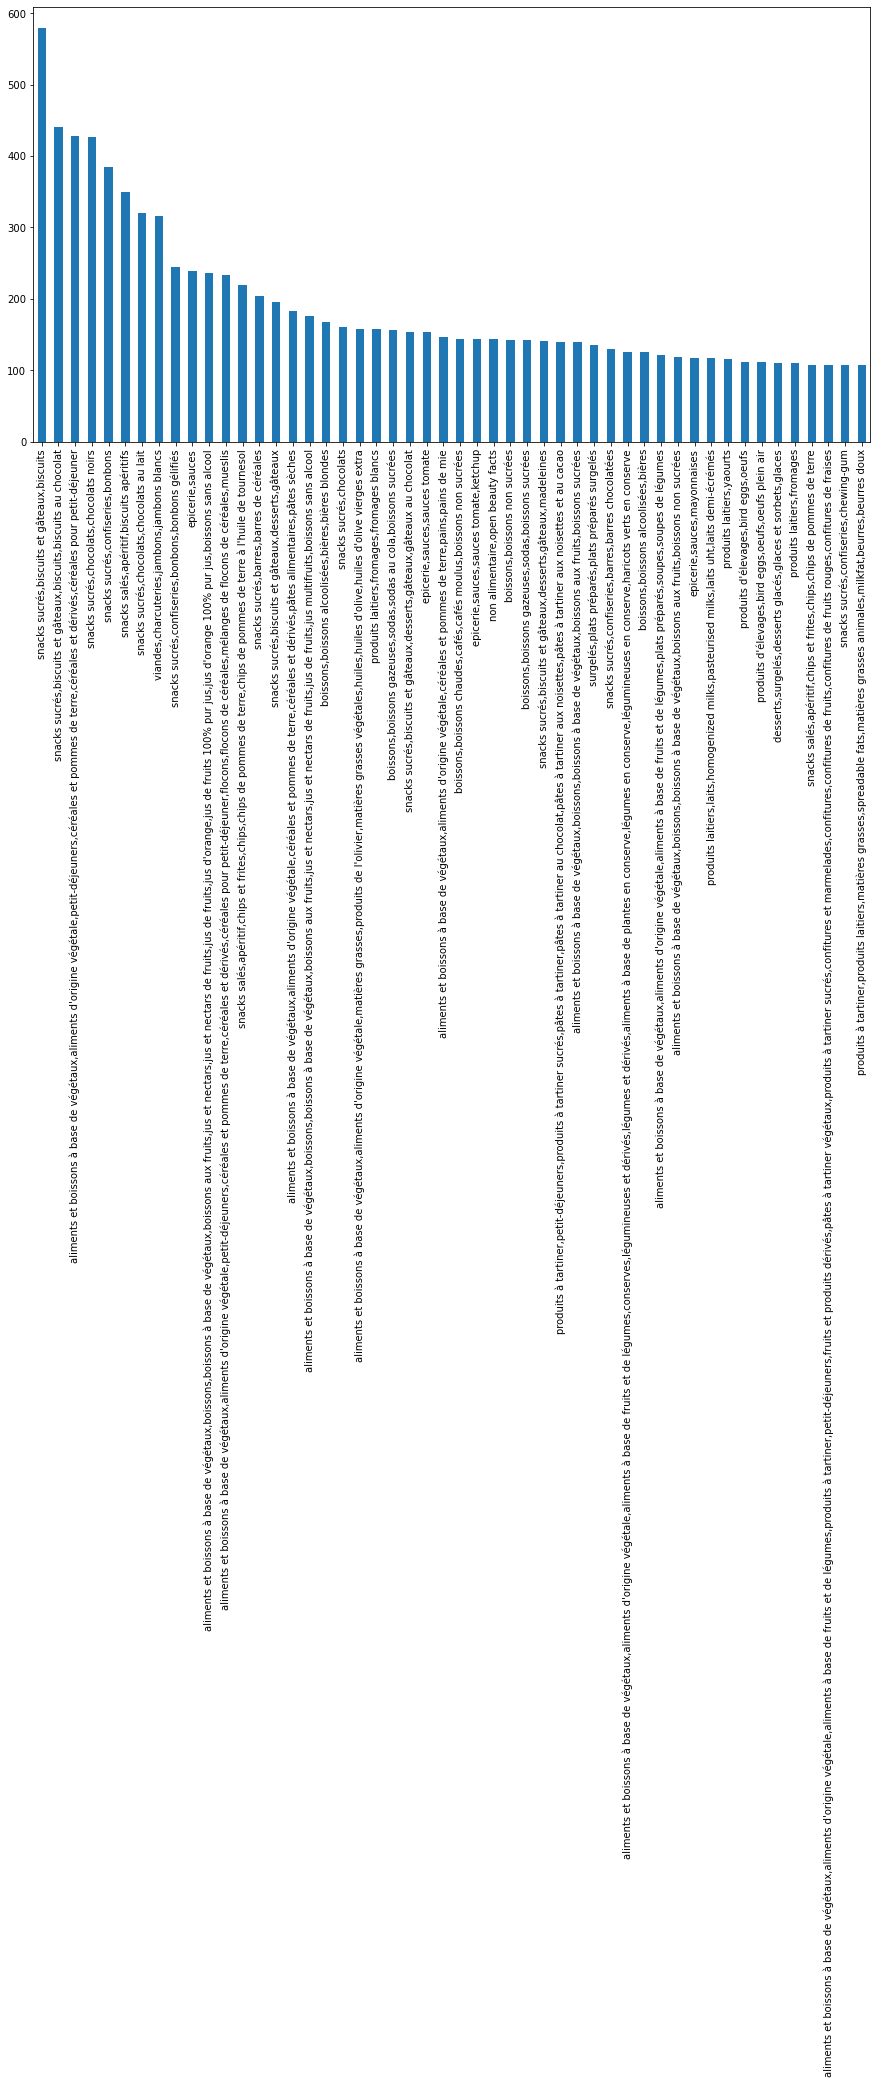

In [365]:
plt.figure(figsize=(15,8))
df['categories_fr'].value_counts()[:50].plot.bar()

In [316]:
df['categories_fr'] = df['categories_fr'].str.lower()

In [429]:
df['categories_fr'].notna().sum()

61943

In [425]:
df['categories_fr'].nunique()

15635

In [428]:
len(get_list_uniques_splits_str('categories_fr'))

9457

In [419]:
def is_list_a_base_for(liste, value):
    result = False
    for element in liste:
        elmt_tmp = element.split
        if value.__contains__(element):
            result = True
            break
    return result

In [422]:
is_list_a_base_for(['snacks sucrés', 'biscuits et gâteaux', 'biscuits'], 'biscuits au chocolat')

True

In [431]:
def get_list_keywords(col_name):
    list_tmp = []
    list_splits = df[col_name].value_counts().index.str.split(',').tolist()
    for list_values in list_splits:
        for value in list_values:
            if (value not in list_tmp) and  not is_list_a_base_for(list_tmp, value):
                list_tmp.append(value)
    return list_tmp

In [432]:
L_categ_kw = get_list_keywords('categories_fr')
len(L_categ_kw)

3286

In [434]:
show_list_elements_with = lambda value : [element for element in L_categ_kw if element.__contains__(value)]

In [433]:
L_categ_kw

['snacks sucrés',
 'biscuits et gâteaux',
 'biscuits',
 'aliments et boissons à base de végétaux',
 "aliments d'origine végétale",
 'petit-déjeuners',
 'céréales et pommes de terre',
 'céréales et dérivés',
 'céréales pour petit-déjeuner',
 'chocolats',
 'confiseries',
 'bonbons',
 'snacks salés',
 'apéritif',
 'viandes',
 'charcuteries',
 'jambons',
 'epicerie',
 'sauces',
 'boissons',
 'jus et nectars',
 'jus de fruits',
 "jus d'orange",
 'flocons',
 'mueslis',
 'chips et frites',
 'chips',
 'barres',
 'desserts',
 'gâteaux',
 'pâtes alimentaires',
 'pâtes sèches',
 'jus multifruits',
 'bières',
 'matières grasses',
 "produits de l'olivier",
 'huiles',
 'produits laitiers',
 'fromages',
 'sodas',
 'pains',
 'cafés',
 'ketchup',
 'non alimentaire',
 'open beauty facts',
 'madeleines',
 'produits à tartiner',
 'pâtes à tartiner',
 'surgelés',
 'plats préparés',
 'aliments à base de fruits et de légumes',
 'conserves',
 'légumineuses et dérivés',
 'légumes et dérivés',
 'aliments à base

In [468]:
show_list_elements_with('vegetable')

['vegetable-based foods and beverages', 'vegetable-based foods']

In [470]:
#stop à abricots secs
len(L_categ_kw[L_categ_kw.index('abricots secs'):])

3021

In [ ]:
set_cat_sucres = set([
    'snacks sucrés','gâteau', 'gateau', 'chocolat', 'bonbon', 'dessert', 'sucrés', 'pâtes à tartiner', 'chocolaté', 'glace',
    'sorbet', 'confiture', 'chewing-gum', 'miels', 'sablé', "pains d'épices", 'glacées','cônes', 'viennoiserie', 'brioche',
    'crêpe', 'smoothies', 'sucre', 'roules-a-la-framboise', 'sirop', 'quatre-quarts', 'financier', 'palmiers', 'popcorn',
    'spéculoos'
])

set_cat_epicerie = set([
    'epicerie', 'sauce', 'pâtes sèches', 'pain', 'ketchup', 'mayonnaise', 'moutarde', 'olive', 'tournesol', 'colza', 'sel',
    'poivre', 'epice', 'épice', 'conserve', 'soupe', 'oeuf', 'oeuf', 'egg', 'pizza', 'condiment', 'saucisson', 'chorizo',
    'sardines en', 'sardines à', 'semoule', 'velouté', 'déshydratés', 'lyophilisés', 'sec', 'biscotte', 'prianiki', 'riz',
    'pâtes à tarte', 'pâtes feuilletées', 'préparés', 'hamburgers', 'purées en flocons', 'foies gras', 'jus de tomates',
    'vinaigre', 'légumineuses', 'muesli', 'egg', 'condiment', 'compotes', 'graines', 'pois', 'sandwich', 'maïs', 'margarine',
    'galette', 'gaufre', 'cacahuète' ,'sauce-tomate-cuisine', 'tomate-ronde', 'tomate-en-boite', 'sauce-tomate-bolognaise', 'nl:tomatenpurrees',
    'tomates et dérivés', 'purées de tomates', 'tomates en conserve', 'tomates pelées', 'jus de tomates', 'cassoulet',
    'double-concentre-de-tomate', 'miettes-de-thon-a-la-tomate', 'miettes-de-thon-blanc-a-la-tomate', 'croûtons', 'dattes',
    'coquillettes', 'spaghetti', 'blinis', 'épice', 'gressin', 'nouilles', 'pickle', 'champignon', 'pommes de terre',
    'terrines','bouillons', 'amande', 'cajou', 'noix', 'noisette', 'nut', 'choucroutes'
     
])


set_cat_fruits_legumes = set([
    'légume', 'pois', 'sauce-tomate-cuisine', 'tomate-ronde', 'tomate-en-boite', 'sauce-tomate-bolognaise', 'nl:tomatenpurrees',
    'tomates et dérivés', 'purées de tomates', 'tomates en conserve', 'tomates pelées', 'jus de tomates', 'tomates', 'salade',
    'lentille', 'citron', 'haricot', 'flageolet', 'framboises', 'ratatouilles', 'épinard', 'abricot'
    
])

set_cat_vegan = set([
    'vegetable', 'tofu'
])

set_cat_cereales = set([
    'céréale', 'flocons', 'muesli', 'blé', 'maïs', 'quinoa'
])

set_cat_sales = set([
    'apéritif', 'aperitif', 'prianiki', 'chips', 'salés'
])

set_cat_boissons = set([
    'boisson', 
])

set_cat_boissons_sucres = set([
    'soda', 'nectar', 'nectar', 'jus', 'sans-alcool'
])

set_cat_boissons_chaudes = set([
    'café', 'infusion'
])

set_cat_boiss_alc = set([
    'vin', 'biere', 'bière', 'champagne', 'liqueur', 
])

set_car_charcuterie = set([
    'rosette', 'saucisson', 'jambon', 'knacks'
])

set_cat_eaux = set([
    'eau'
    
])

set_cat_poisson = set([
    'sardine', 'poisson', 'fish','sardines','thon', 'crevettes','fisch', 'pesce','cabillaud', 'saumon', 'maquereau', 
    'colin', 'brochet', 'écrevisses', 'limande','poissons', 'truite', 'lieu', 'anchois', 'homard',
    'maquereaux', 'langoustines', 'morue', 'esturgeon', 'mer', 'merlu', 'gambas', 'merlan', 'bar', 'rouget',
    'barbet', 'langoustine', 'harengs', 'hareng', 'mollusques', 'molluschi', 'jacques','pulpe', 'poulpe', 'encornet',
    'calamars', 'calmars', 'seiche', 'encornets', 'seiches', 'crustacés,', 'crustaces', 'surimi', 'crabe', 'crustacei',
    'curstaces', 'crustacee', 'crustacees', 'drustace','huitre', 'clams', 'coquillages', 'huître', 'tourteau', 'crustace',
    'moule', 'bulots'
])

set_cat_viandes = set([
    'poulet', 'steak', 'boeuf', 'mouton', 'dinde', 'volaille', 'canard', 'dinde', 'lapin', 'lièvre', 'lardon', 'saucisse',
    'porc'
    
])

set_cat_surgeles = set([
    'frite', 'surgele', 'lasagnes aux légumes'
])

set_cat_plats_prepares = set([
    'lasagnes aux légumes', 'plat', 'pizza', 'burger', 'quiches', 'substitut', 'tofu', 'pâtes farcies', 'ravioli', 
    'roules-au-fromage', 'ratatouilles'
])

set_cat_laitiers = set([
    'laitier', 'fromage', 'lait', 'beurre', 'yaourts', 'crème', 'comté', 'lait','lactiques','lactosérum', 'milk', 'lactose', 
    'creme', 'beurre', 'laitier', 'laiit','lactoserum', 'comté', 'milch', 'vollmilchpulver', 'butterreinfett', 
    'magermilchpulver', 'fromage', 'emmental', 'lctosa', 'ferment', 'lacto', 'caséinates', 'maroilles'
    'laitière', 'roquefort', 'creme', 'pecorino', 'parmigiano', 'milchzucker', 'milcheiweißhydrolysat', 'gouda',
    'edam', 'actosérum', 'mozzarella', 'raclette', 'ricotta', 'tome', 'cheddar', 'milchschokolade', 'crème',
    'molkenpulver', 'parmesan', 'maroilles', 'sahnepulver', 'butter', 'magermilchjoghurtpulver', 
    'vollmilchpulver', 'leite', 'iactose', 'beaufort','yaourt', 'magermilch', 'yaourts' ,'sahnepulver', 'édam',
    'présure', 'mascarpone', 'latte', 'feta', 'mimolette', 'laktose', 'iait', 'fromage', 'milchserum',
    'reblochon', 'eiweißpulver', 'magermilchjoghurtpulver', 'milcheiweiß', 'magermilchkonzentrat',
    'milchserumkonzentrat', 'whey', 'cantal', 'leche', 'lactosa', 'mantequilla', 'kuhmilch', 'weichkäse',
    'süßmlkenpulver', 'molke', 'magermllchpulver', 'gorgonzola', 'crème', 'laitiers', 'iactosèrum', 
    'emmenthal', 'cream', 'lactate', 'beure', 'magemilchpulver', 'bleu', 'kondensmagermilch', 'caséinate', 
    'gouda', 'écrémé', 'schlagsahne', 'milcheiweißpulver', 'vollfett-frischkäse', 'schlagsahne', 'reblochon',
    'ziegenmilch', 'tomme', 'laitiére', 'laitiéres', 'ialt', 'lactique', 'iactoserum', 'pecorino', 'ferments',          
])


In [343]:
list_mots_liaison = ["a", "à", "base", "avec", "pour", "et", "d'", "sans", "en", "partir", "le", "la", "les", "l'", "des", 
                     "du", "au"]

In [412]:
def get_list_unique_keywords(liste):
    list_kw = []
    for elmt1 in liste:
        elmt_tmp = elmt1.split()
        for elmt2 in elmt_tmp:
            if (elmt2.strip() not in list_mots_liaison) and (elmt2.strip() not in list_kw):
                list_kw.append(elmt2.strip())
    return list_kw